Disposition
Description

Substantiated
The alleged conduct occurred and it violated the rules. 
(A breakdown of the types of discipline the CCRB can recommend is here: https://www1.nyc.gov/site/ccrb/prosecution/police-discipline.page)
The NYPD can choose to ignore those recommendations. It has discretion over what, if any, discipline is imposed.)

Exonerated
The alleged conduct occurred but did not violate the NYPD’s rules, which often give officers significant discretion over use of force.

Unsubstantiated
The CCRB has fully investigated but could not affirmatively conclude both that the conduct occurred and that it broke the rules.

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
# dataframe = df
nypd = pd.read_csv('C:\\Users\\Rose\\Desktop\\JupyterStuff\\allegations.csv')

In [44]:
df = nypd.copy()

In [47]:
df.head()

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [45]:
df.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   complaint_id              33358 non-null  int64  
 5   month_received            33358 non-null  int64  
 6   year_received             33358 non-null  int64  
 7   month_closed              33358 non-null  int64  
 8   year_closed               33358 non-null  int64  
 9   command_at_incident       31814 non-null  object 
 10  rank_abbrev_incident      33358 non-null  object 
 11  rank_abbrev_now           33358 non-null  object 
 12  rank_now                  33358 non-null  object 
 13  rank_incident             33358 non-null  object 
 14  mos_et

In [17]:
df.shape

(33358, 26)

In [10]:
df.sort_values

<bound method DataFrame.sort_values of        unique_mos_id first_name last_name command_now  complaint_id  \
0              10004   Jonathan      Ruiz     078 PCT         42835   
1              10007       John     Sears     078 PCT         24601   
2              10007       John     Sears     078 PCT         24601   
3              10007       John     Sears     078 PCT         26146   
4              10009      Noemi    Sierra     078 PCT         40253   
...              ...        ...       ...         ...           ...   
33353           9992     Tomasz  Pulawski     078 PCT         35671   
33354           9992     Tomasz  Pulawski     078 PCT         35671   
33355           9992     Tomasz  Pulawski     078 PCT         35671   
33356           9992     Tomasz  Pulawski     078 PCT         35671   
33357           9992     Tomasz  Pulawski     078 PCT         35671   

       month_received  year_received  month_closed  year_closed  \
0                   7           2019     

In [14]:
df.sort_values(by=['year_received'], inplace=True, ascending=False)
df

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
32429,905,Brendan,Dono,010 PCT,43703,1,2020,6,2020,010 PCT,...,39,Hispanic,Male,42.0,Abuse of Authority,Vehicle search,10.0,Other violation of VTL,Summons - other violation/crime,Exonerated
14533,23011,Robert,Obrien,INT CIS,43683,1,2020,5,2020,INT CIS,...,35,NaN,NaN,NaN,Abuse of Authority,Entry of Premises,79.0,Execution of search warrant,No arrest made or summons issued,Exonerated
14535,23011,Robert,Obrien,INT CIS,43683,1,2020,5,2020,INT CIS,...,35,NaN,NaN,NaN,Abuse of Authority,Search of Premises,79.0,Execution of search warrant,No arrest made or summons issued,Exonerated
14534,23011,Robert,Obrien,INT CIS,43683,1,2020,5,2020,INT CIS,...,35,Black,Female,56.0,Abuse of Authority,Property damaged,79.0,Execution of search warrant,No arrest made or summons issued,Exonerated
23264,3197,Robert,Erbetta,034 PCT,42243,4,2019,6,2020,034 PCT,...,23,Hispanic,Male,34.0,Offensive Language,Physical disability,34.0,Other,No arrest made or summons issued,Substantiated (Formalized Training)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805,17403,Edward,Mullane,CD OP/D,517,9,1985,9,1985,NaN,...,25,NaN,NaN,NaN,Force,Push/Shove,83.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
5806,17403,Edward,Mullane,CD OP/D,517,9,1985,9,1985,NaN,...,25,NaN,NaN,NaN,Abuse of Authority,Arrest/D. A. T.,83.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
10891,20619,Troy,Patterson,FAM SEC,525,10,1985,10,1985,NaN,...,23,NaN,NaN,NaN,Force,Dragged/Pulled,71.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated
10892,20619,Troy,Patterson,FAM SEC,525,10,1985,10,1985,NaN,...,23,NaN,NaN,NaN,Abuse of Authority,Arrest/Onlooker,71.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated


In [ ]:
#groupby and count of how many conplaints for a pericent and count how many for that pericent

In [21]:
df.groupby('precinct')

In [29]:
a=df.groupby('precinct')

In [30]:
df.groupby('precinct').count()

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,contact_reason,outcome_description,board_disposition
precinct,,,,,,,,,,,,,,,,,,,,,
0.0,21,21,21,21,21,21,21,21,21,9,...,21,21,2,2,2,21,21,18,21,21
1.0,174,174,174,174,174,174,174,174,174,170,...,174,174,164,166,163,174,174,171,174,174
5.0,160,160,160,160,160,160,160,160,160,157,...,160,160,153,153,153,160,160,160,160,160
6.0,175,175,175,175,175,175,175,175,175,171,...,175,175,163,164,160,175,175,175,175,175
7.0,221,221,221,221,221,221,221,221,221,210,...,221,221,188,190,180,221,221,221,221,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120.0,844,844,844,844,844,844,844,844,844,830,...,844,844,751,760,751,844,844,842,843,844
121.0,366,366,366,366,366,366,366,366,366,366,...,366,366,345,346,341,366,366,366,366,366
122.0,238,238,238,238,238,238,238,238,238,232,...,238,238,214,218,210,238,238,238,238,238


In [37]:
df.groupby('precinct')[['last_name']].count()

,last_name
precinct,
0.0,21
1.0,174
5.0,160
6.0,175
7.0,221
...,...
120.0,844
121.0,366
122.0,238


In [48]:
a.count()

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,contact_reason,outcome_description,board_disposition
precinct,,,,,,,,,,,,,,,,,,,,,
0.0,21,21,21,21,21,21,21,21,21,9,...,21,21,2,2,2,21,21,18,21,21
1.0,174,174,174,174,174,174,174,174,174,170,...,174,174,164,166,163,174,174,171,174,174
5.0,160,160,160,160,160,160,160,160,160,157,...,160,160,153,153,153,160,160,160,160,160
6.0,175,175,175,175,175,175,175,175,175,171,...,175,175,163,164,160,175,175,175,175,175
7.0,221,221,221,221,221,221,221,221,221,210,...,221,221,188,190,180,221,221,221,221,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120.0,844,844,844,844,844,844,844,844,844,830,...,844,844,751,760,751,844,844,842,843,844
121.0,366,366,366,366,366,366,366,366,366,366,...,366,366,345,346,341,366,366,366,366,366
122.0,238,238,238,238,238,238,238,238,238,232,...,238,238,214,218,210,238,238,238,238,238


In [49]:
df.sort_values(by=['last_name'], inplace=True, ascending=False)
df

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
11101,208,Charles,Zwilling,005 DET,16096,6,2008,6,2009,019 PCT,...,33,White,Male,NaN,Abuse of Authority,Retaliatory summons,19.0,Other,Arrest - resisting arrest,Substantiated (Charges)
11103,208,Charles,Zwilling,005 DET,37350,6,2017,9,2017,020 PCT,...,42,Black,Female,40.0,Abuse of Authority,Other,20.0,C/V at PCT to obtain information,No arrest made or summons issued,Exonerated
11100,208,Charles,Zwilling,005 DET,13590,5,2007,4,2008,019 PCT,...,32,Refused,Male,41.0,Force,Physical force,19.0,Report-noise/disturbance,Arrest - resisting arrest,Exonerated
11102,208,Charles,Zwilling,005 DET,16096,6,2008,6,2009,019 PCT,...,33,White,Male,NaN,Force,Physical force,19.0,Other,Arrest - resisting arrest,Substantiated (Charges)
30217,6846,Howard,Zweben,061 PCT,26186,7,2012,7,2013,PBMN,...,32,Hispanic,Male,25.0,Discourtesy,Word,34.0,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Unsubstantiated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23585,32073,Jacob,Aaronson,SRG 1,15013,12,2007,9,2008,PSA 5,...,26,Hispanic,Male,19.0,Discourtesy,Word,23.0,Other,No arrest made or summons issued,Unsubstantiated
2680,13091,Gary,Aaronson,107 PCT,16770,10,2008,12,2009,107 PCT,...,38,Black,Male,36.0,Abuse of Authority,Refusal to provide name/shield number,107.0,Other,No arrest made or summons issued,Exonerated
2679,13091,Gary,Aaronson,107 PCT,38259,10,2017,1,2018,107 PCT,...,47,Other Race,Male,68.0,Abuse of Authority,Threat of force (verbal or physical),107.0,Report-noise/disturbance,No arrest made or summons issued,Unsubstantiated
2678,13091,Gary,Aaronson,107 PCT,35702,8,2016,11,2016,107 PCT,...,45,Black,Female,44.0,Abuse of Authority,Refusal to provide name/shield number,107.0,Report of other crime,No arrest made or summons issued,Substantiated (Formalized Training)


In [50]:
badge = df['unique_mos_id']
badge.value_counts()

25861    75
18731    75
19489    73
18530    73
18589    72
         ..
11517     1
26350     1
22637     1
22280     1
5334      1
Name: unique_mos_id, Length: 3996, dtype: int64

In [51]:
df.last_name.value_counts()

Rodriguez      294
Ortiz          200
Rivera         183
Martinez       170
Perez          162
              ... 
Montesdeoca      1
Brennan          1
Larrieux         1
Tornabene        1
Olexa            1
Name: last_name, Length: 2835, dtype: int64

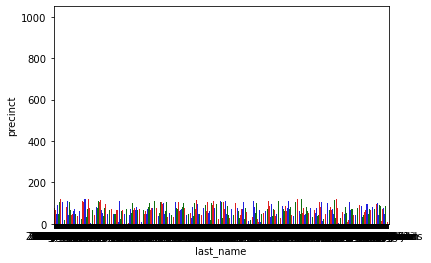

In [41]:
ax = sns.barplot(x = 'last_name', y = 'precinct', data = df, palette = ["red", "green", "blue"], ci = False)

In [ ]:
#start with 10+ indicents
# relation btw indicents and offereicers rank of being promoted 

make a column of the unique ids and count

make a new column combine of first and last name that is unique then group by - grouby value count of the compliant id 

unique mos is the badge number 